## Libraries

In [3]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

rs = 331438

### Loading csv file

In [4]:
df_dev = pd.read_csv('development.csv')
df_eval = pd.read_csv('evaluation.csv')

print('First rows of the Development DataFrames are:')
display(df_dev.head())
print('First rows of the Development DataFrames are:')
display(df_eval.head())

First rows of the Development DataFrames are:


,x,y,pmax[0],negpmax[0],area[0],tmax[0],rms[0],pmax[1],negpmax[1],area[1],...,pmax[16],negpmax[16],area[16],tmax[16],rms[16],pmax[17],negpmax[17],area[17],tmax[17],rms[17]
0,200.0,200.0,4.066907,-17.690173,2.847932,0.600000,2.007042,5.409161,-17.721210,4.538778,...,607.109118,-36.282996,583.899899,72.373094,0.374498,614.916861,-39.848523,591.852768,72.331028,0.405595
1,200.0,200.0,5.916801,-4.717111,5.792778,79.765174,1.564535,4.414289,-4.736827,3.720435,...,630.348007,-39.715988,580.042799,71.029155,0.403258,624.950701,-41.266681,586.569646,71.089058,0.405890
2,200.0,200.0,4.286652,-5.316132,2.356390,74.600000,1.404622,4.567191,-5.985437,3.490490,...,613.880342,-40.679678,580.407491,71.892264,0.568777,596.437125,-42.712286,574.091695,71.943934,0.498019
3,200.0,200.0,4.003635,-4.617459,2.189005,43.000000,1.512162,5.019058,-4.229949,6.786200,...,600.714957,-43.206601,579.882635,72.357388,0.255483,591.763739,-50.681940,584.099483,72.333282,0.336454
4,200.0,200.0,4.448146,-4.848743,3.997002,196.667482,1.101113,3.250262,-5.783587,2.449456,...,609.723785,-43.570892,590.156125,71.249130,0.413855,606.917023,-49.923819,584.316142,71.242904,0.293824


First rows of the Development DataFrames are:


,Id,pmax[0],negpmax[0],area[0],tmax[0],rms[0],pmax[1],negpmax[1],area[1],tmax[1],...,pmax[16],negpmax[16],area[16],tmax[16],rms[16],pmax[17],negpmax[17],area[17],tmax[17],rms[17]
0,0,4.400616,-4.257770,2.860212,176.600000,1.562814,8.738040,-3.598874,5.554105,70.800000,...,614.621212,-42.232574,583.237137,70.693530,0.861022,608.931417,-42.728827,568.019556,70.755552,0.328075
1,1,5.599571,-2.974570,9.400537,90.677386,1.129626,23.460358,-20.616669,17.998419,72.800000,...,520.333440,-36.986118,550.540448,72.781390,0.259205,613.671695,-44.449564,586.292097,72.900695,0.401326
2,2,3.731995,-5.662292,1.930957,155.200000,0.921757,4.837952,-7.224267,3.289124,67.057395,...,607.642389,-46.680069,582.825835,71.407320,0.552691,608.996069,-45.877765,589.520958,71.406020,0.343592
3,3,5.657729,-4.600342,5.593030,30.463179,1.269390,87.293692,-45.786813,38.422989,71.800000,...,596.094911,-48.241263,577.835129,72.011986,0.361220,612.500144,-49.572583,583.795426,72.066338,0.429650
4,4,3.716666,-4.583796,1.946927,33.600000,1.082743,9.593125,-5.374179,7.767408,72.414459,...,620.793628,-37.618567,599.834735,72.251813,0.390639,621.557649,-45.189832,600.988676,72.151243,0.358549


Check if the dataset is homogeneous

In [5]:
coord_count = df_dev.groupby(['x', 'y']).size().to_dict()
display(coord_count)

{(200.0, 200.0): 100,
 (200.0, 220.0): 100,
 (200.0, 225.0): 100,
 (200.0, 230.0): 100,
 (200.0, 235.0): 100,
 (200.0, 240.0): 100,
 (200.0, 250.0): 100,
 (200.0, 260.0): 100,
 (200.0, 270.0): 100,
 (200.0, 275.0): 100,
 (200.0, 280.0): 100,
 (200.0, 285.0): 100,
 (200.0, 290.0): 100,
 (200.0, 295.0): 100,
 (200.0, 300.0): 100,
 (200.0, 305.0): 100,
 (200.0, 310.0): 100,
 (200.0, 320.0): 100,
 (200.0, 325.0): 100,
 (200.0, 335.0): 100,
 (200.0, 340.0): 100,
 (200.0, 350.0): 100,
 (200.0, 365.0): 100,
 (200.0, 370.0): 100,
 (200.0, 375.0): 100,
 (200.0, 380.0): 100,
 (200.0, 385.0): 100,
 (200.0, 390.0): 100,
 (200.0, 395.0): 100,
 (200.0, 400.0): 100,
 (200.0, 405.0): 100,
 (200.0, 410.0): 100,
 (200.0, 415.0): 100,
 (200.0, 430.0): 100,
 (200.0, 435.0): 100,
 (200.0, 440.0): 100,
 (200.0, 445.0): 100,
 (200.0, 450.0): 100,
 (200.0, 455.0): 100,
 (200.0, 460.0): 100,
 (200.0, 465.0): 100,
 (200.0, 475.0): 100,
 (200.0, 480.0): 100,
 (200.0, 485.0): 100,
 (200.0, 490.0): 100,
 (200.0, 4

The dataset is homogeneous.

A potentially interesting information regards the existance of empty (or Not a Number) values.


In [6]:
NaN_dev_mask = df_dev.isna().any(axis=0)
NaN_eval_mask = df_eval.isna().any(axis=0)

print(f'NaN values for developments.csv: \t{NaN_dev_mask[NaN_dev_mask == True]}')
print(f'NaN values for evaluation.csv: \t\t{NaN_eval_mask[NaN_eval_mask == True]}')


NaN values for developments.csv: 	Series([], dtype: bool)
NaN values for evaluation.csv: 		Series([], dtype: bool)


No presence of NaN values

Scatter plot of coordinates (x,y)

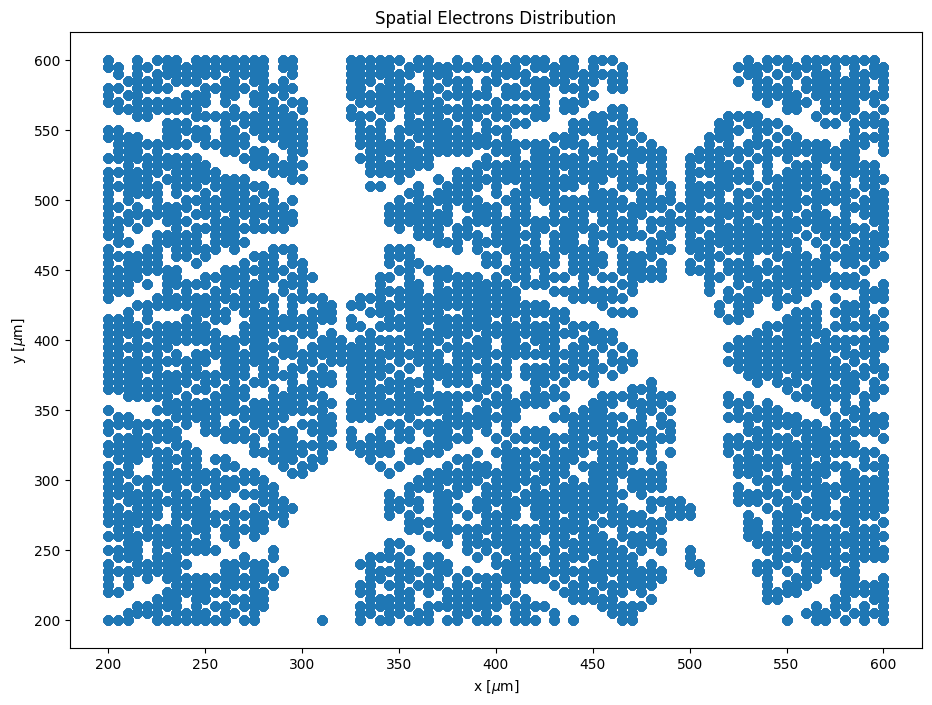

In [7]:
plt.figure(figsize=(11,8))
plt.scatter(x=df_dev['x'].values, y=df_dev['y'].values)
plt.xlabel('x [$\mu$m]')
plt.ylabel('y [$\mu$m]')
plt.title('Spatial Electrons Distribution')
plt.savefig("Spatial_Electrons_Distribution.pdf", bbox_inches="tight")
plt.show()

## Outliers

In [8]:
outlier_counts = pd.Series()

for column in df_dev.iloc[:,2:].columns:
    quantile25 = df_eval[column].quantile(0.25)
    quantile75 = df_eval[column].quantile(0.75)
    diff = quantile75 - quantile25
    low = quantile25 - 1.5 * diff
    up = quantile75 + 1.5 * diff
    outliers = df_eval[(df_eval[column] < low) | (df_eval[column] > up)][column]
    outlier_counts[column] = len(outliers)

print(outlier_counts[outlier_counts==0])

tmax[0]     0
tmax[7]     0
tmax[12]    0
tmax[15]    0
tmax[16]    0
tmax[17]    0
dtype: int64


## Noise

Let's evaluate the presence of noise in the data. It is known that only 12 pads are real measuration. In order to do so, different methods:
- SNR estimation
- Correlation of the features

In [9]:
df_dev_features = df_dev.drop(columns=['x', 'y'])

Selecting the 6 worst SNR ...


100%|██████████| 257000/257000 [01:35<00:00, 2699.32it/s]


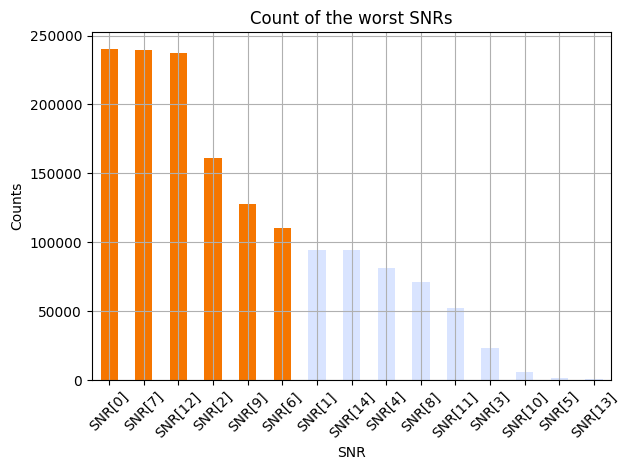

In [10]:
# STRATEGY 1: the area is the signal and RMS is the white noise

pmax_start_column = 'pmax[0]'
negpmax_start_column = 'negpmax[0]'

pmax_start_index = df_dev_features.columns.get_loc(pmax_start_column)
pmax_columns_name = [df_dev_features.iloc[:, pmax_start_index+5*i].name for i in range(0, 18)]

negpmax_start_index = df_dev_features.columns.get_loc(negpmax_start_column)
negpmax_columns_name = [df_dev_features.iloc[:, negpmax_start_index+5*i].name for i in range(0, 18)]



S = df_dev_features[pmax_columns_name].values**2 + df_dev_features[negpmax_columns_name].values**2
N = np.var(np.random.randn(S.shape[0]))

snr_name_columns = [f'SNR[{i}]' for i in range(18)]
# Selecting the absolute value of S: what does matter is the amplitude of the signal only
SNR = pd.DataFrame(10*np.log10(S/N), columns=snr_name_columns)

worst_SNR_list = []
# Taking a small fraction of SNR Dataframe
SNR_frac = SNR.sample(frac=2/3, random_state=331438)
print('Selecting the 6 worst SNR ...')
for i in tqdm(range((len(SNR_frac)))):
    worst_SNR_list.append(SNR_frac.iloc[i,:].sort_values(ascending=False).iloc[12:].index.to_list())

# Once created, merge all the lists in a single list    
worst_SNR_list = [worst_SNR for SNR_list in worst_SNR_list for worst_SNR in SNR_list]
# Converting the list in a Serie to use value_counts()
worst_SNR_counts = pd.Series(worst_SNR_list).value_counts()

# PLOT
colors = ['#f57600' if i < 6 else '#d9e4ff' for i in range(len(worst_SNR_counts))]
worst_SNR_counts.plot(kind='bar', color=colors)
plt.xlabel('SNR')
plt.ylabel('Counts')
plt.title('Count of the worst SNRs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.savefig('SNR.pdf', bbox_inches="tight")
plt.show()


Correlation method

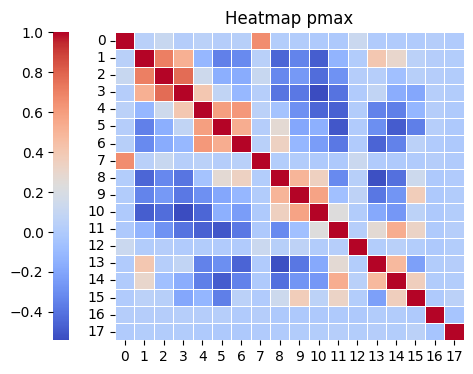

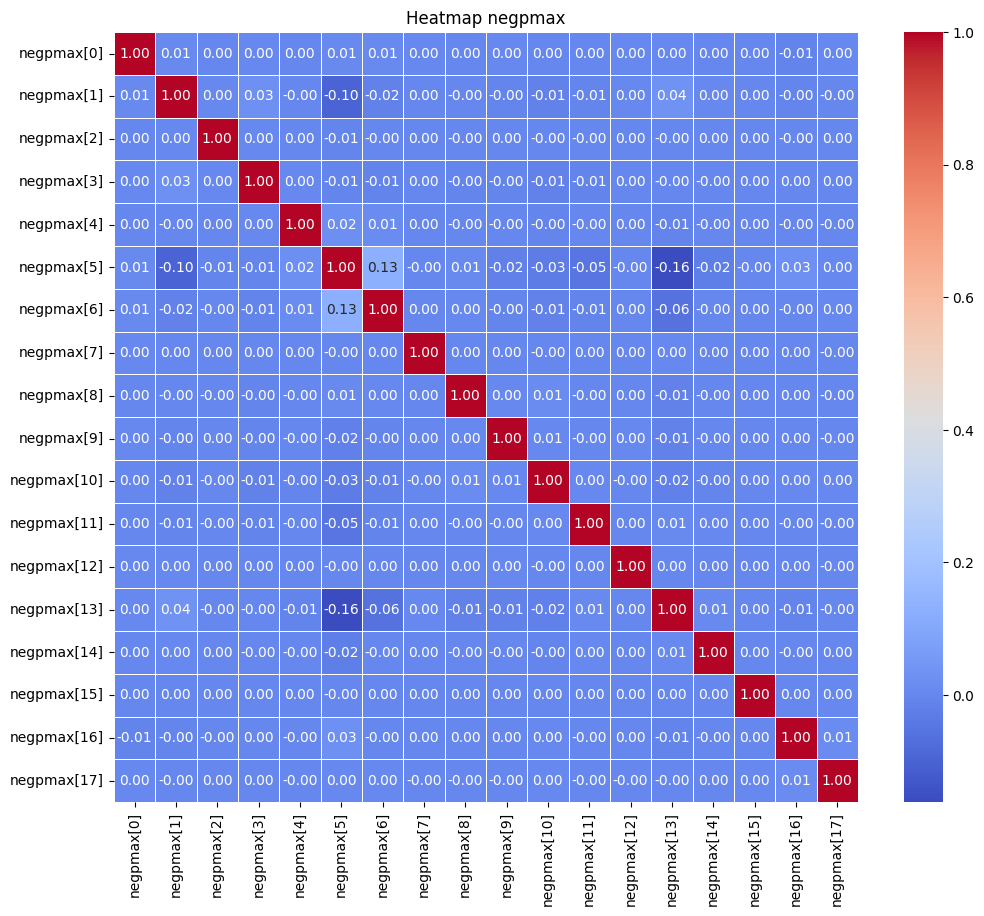

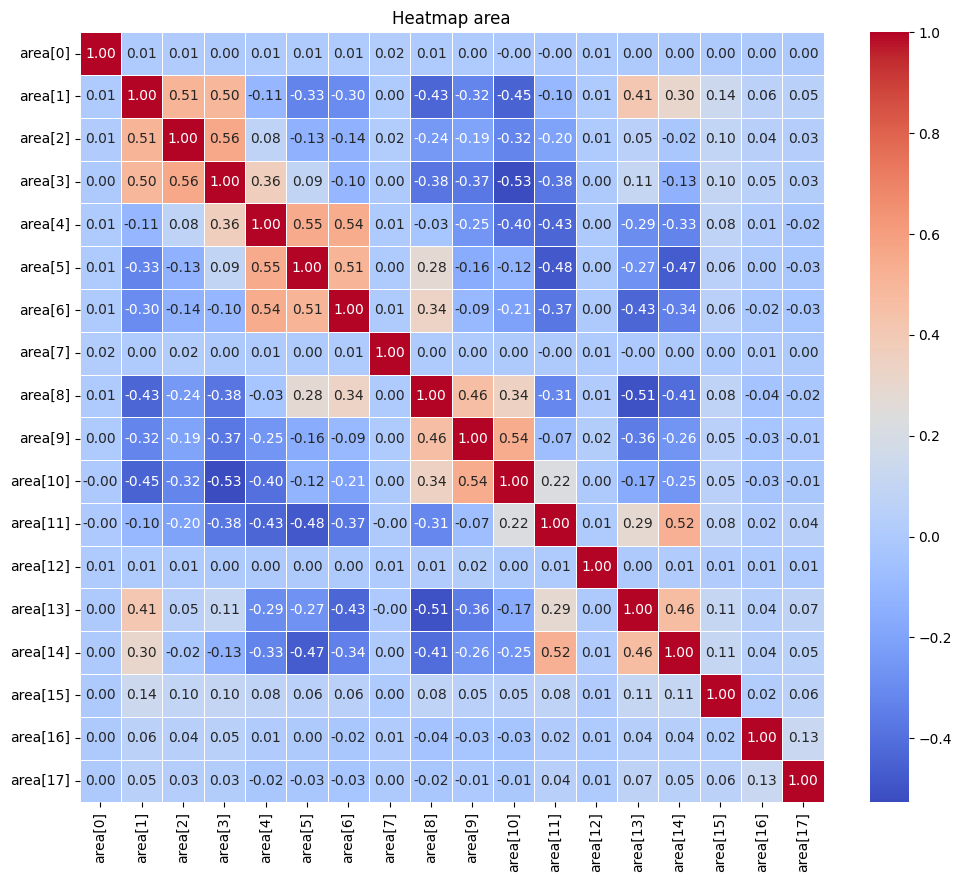

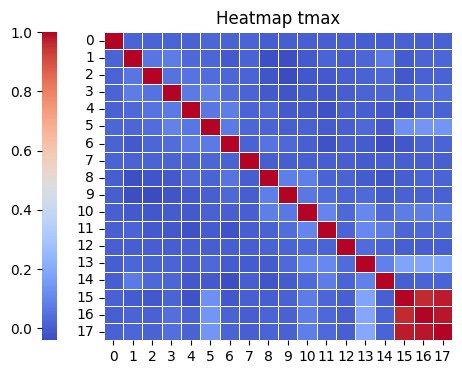

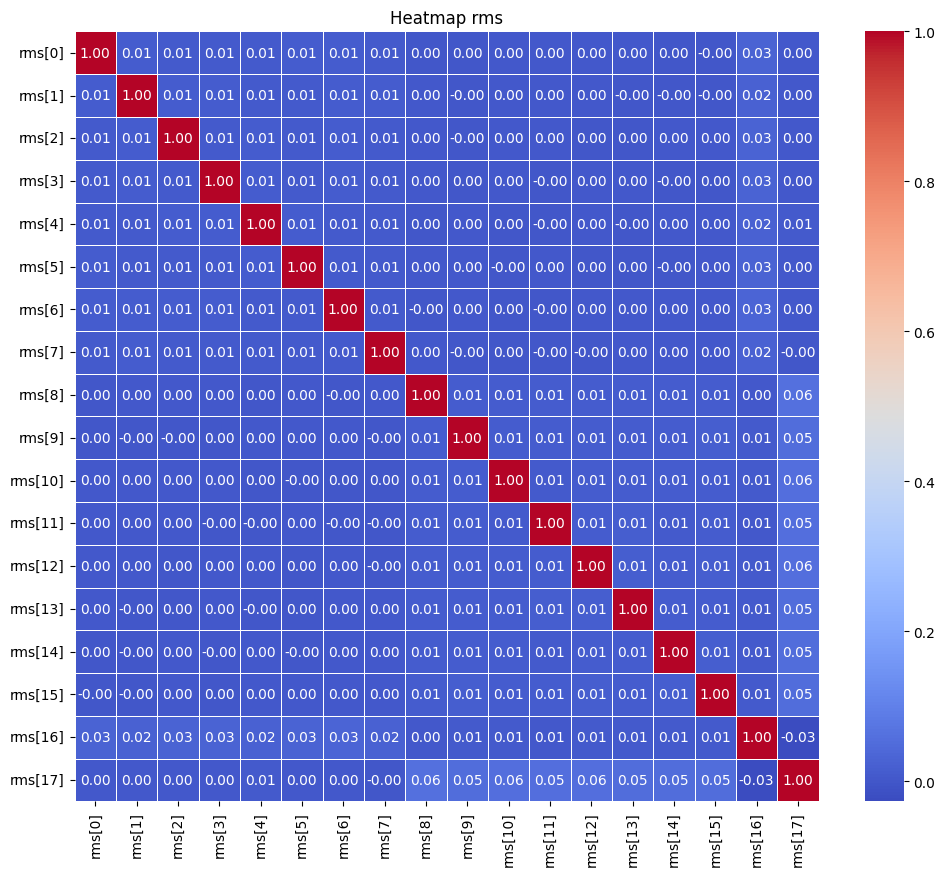

In [11]:
# Correlation
# Every df is taken from the development dataset
df_pmax = df_dev.iloc[:,[i+2 for i in range(0,len(df_eval.columns)-2,5)]]
df_negpmax = df_dev.iloc[:,[i+3 for i in range(0,len(df_eval.columns)-2,5)]]
df_area = df_dev.iloc[:,[i+4 for i in range(0,len(df_eval.columns)-2,5)]]
df_tmax = df_dev.iloc[:,[i+5 for i in range(0,len(df_eval.columns)-2,5)]]
df_rms = df_dev.iloc[:,[i+6 for i in range(0,len(df_eval.columns)-2,5)]]

df_pmax.columns = range(len(df_pmax.columns))
corr_pmax = df_pmax.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_pmax, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={"location": "left"})
plt.title("Heatmap pmax")
plt.savefig('hpmax.pdf', bbox_inches="tight")
plt.show()

corr_negpmax = df_negpmax.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_negpmax, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Heatmap negpmax")
plt.show()

corr_area = df_area.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_area, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Heatmap area")
plt.show()

df_tmax.columns = range(len(df_tmax.columns))
corr_tmax = df_tmax.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_tmax, annot=False, cmap='coolwarm', linewidths=.5, cbar_kws={"location": "left"})
plt.title("Heatmap tmax")
plt.savefig('htmax.pdf', bbox_inches="tight")
plt.show()

corr_rms = df_rms.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_rms, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Heatmap rms")
plt.show()

The two methods differs from 2 columns

In [12]:
list_index_noise = [0, 2, 6, 7, 9, 12]
padname_list = df_dev.iloc[1,2:7].index.to_list()
padname_list = [item.replace('[0]', '') for item in padname_list]
list_column_noise = [f'{padname}[{i}]' for padname in padname_list for i in list_index_noise]

df_dev_denoised_snr = df_dev.drop(columns=list_column_noise)
df_eval_denoised_snr = df_eval.drop(columns=list_column_noise)

list_index_noise = [0, 7, 12, 15, 16, 17]
padname_list = df_dev.iloc[1,2:7].index.to_list()
padname_list = [item.replace('[0]', '') for item in padname_list]
list_column_noise = [f'{padname}[{i}]' for padname in padname_list for i in list_index_noise]

df_dev_denoised_corr = df_dev.drop(columns=list_column_noise)
df_eval_denoised_corr = df_eval.drop(columns=list_column_noise)

## PCA analysis

In [13]:
denoised_features_list = df_dev_denoised_snr.drop(columns=['x', 'y']).columns.to_list()
Xworkdf = df_dev_denoised_snr[denoised_features_list]

STDscaler = StandardScaler()
Xworkdf_std = STDscaler.fit_transform(Xworkdf)

Xworkdf_std = pd.DataFrame(Xworkdf_std, columns=Xworkdf.columns)

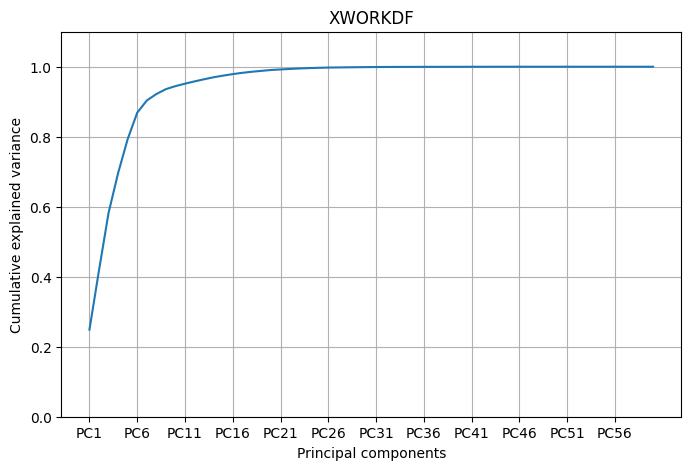

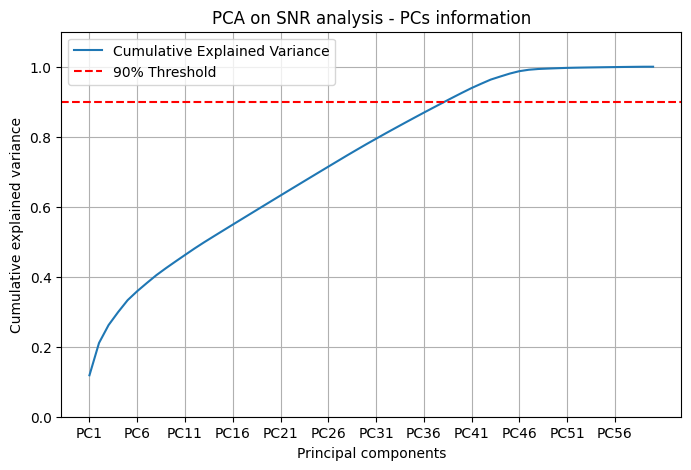

In [40]:
pca_nostd = PCA(random_state=rs)
pca_std = PCA(random_state=rs)

pca_nostd.fit(Xworkdf)
pca_std.fit(Xworkdf_std)

explained_variance_std = np.cumsum(pca_std.explained_variance_ratio_)

#pca_nostd
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca_nostd.explained_variance_ratio_))
plt.title('XWORKDF')
plt.ylim([0, 1.1])
plt.xticks(ticks=np.arange(0,pca_nostd.n_features_in_,5), 
           labels=[f'PC{i + 1}' for i in range(0,pca_nostd.n_features_in_,5)])
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()


#pca_std
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca_std.explained_variance_ratio_))
plt.axhline(y=0.90, color='r', linestyle='--')
plt.title('PCA on SNR analysis - PCs information')
plt.ylim([0, 1.1])
plt.xticks(ticks=np.arange(0, pca_std.n_features_in_, 5), 
           labels=[f'PC{i + 1}' for i in range(0, pca_std.n_features_in_, 5)])
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.legend(['Cumulative Explained Variance', '90% Threshold']) 
plt.grid()
plt.savefig('pca_std.pdf', bbox_inches='tight')
plt.show()


90% of information

In [41]:
n_std = np.argmax(explained_variance_std >= 0.90) + 1

print(f'Number of PCs selected (Standard Scaler): {n_std}')

pca_std = PCA(n_components=n_std, random_state = rs)

Number of PCs selected (Standard Scaler): 39


### Regressor

In [16]:

X_corr = df_dev_denoised_corr.iloc[:,2:].values
X_snr = df_dev_denoised_snr.iloc[:,2:].values
X_std = pca_std.fit_transform(Xworkdf_std)

y = df_dev[['x','y']].values

X_corr_train, X_corr_valid, y_corr_train, y_corr_valid = train_test_split(X_corr, y, shuffle=True, random_state=rs, train_size=.8)
X_snr_train, X_snr_valid, y_snr_train, y_snr_valid = train_test_split(X_snr, y, shuffle=True, random_state=rs, train_size=.8)
X_std_train, X_std_valid, y_std_train, y_std_valid = train_test_split(X_std, y, shuffle=True, random_state=rs, train_size=.8)

To train a random forest, let's see the maximum depth of a decision tree

In [63]:
reg_dec = DecisionTreeRegressor()
reg_dec.fit(X_snr_train, y_snr_train)
max_depth_snr = reg_dec.get_depth()
print(f"Maximum depth (SNR): {max_depth_snr}")

reg_dec.fit(X_corr_train, y_corr_train)
max_depth_corr = reg_dec.get_depth()
print(f"Maximum depth (Correlation): {max_depth_corr}")

reg_dec.fit(X_std_train, y_std_train)
max_depth_std = reg_dec.get_depth()
print(f"Maximum depth (STD): {max_depth_std}")


Maximum depth (SNR): 31
Maximum depth (Correlation): 29
Maximum depth (STD): 35


We can now train a random forest with the default parameters to establish an initial baseline.

In [64]:
def distance(x_vec, y_vec):
    return sum(np.linalg.norm(x_vec-y_vec, axis=1))/x_vec.shape[0]

Grid Search for the best of the best

In [65]:
from sklearn.metrics import make_scorer

euclidean_score = make_scorer(distance, greater_is_better=False)

parameters = {
    'min_samples_leaf':[2, 3, 5],
    'min_samples_split':[1, 2, 4, 8],
}

random_forest_snr = RandomForestRegressor(n_estimators=100, n_jobs=-1, max_features='sqrt', max_depth=max_depth_snr, verbose=10)
random_forest_corr = RandomForestRegressor(n_estimators=100, n_jobs=-1, max_features='sqrt',max_depth=max_depth_corr,verbose=10)
random_forest_std = RandomForestRegressor(n_estimators=100, n_jobs=-1, max_features='sqrt',max_depth=max_depth_std,verbose=10)

grid_search_snr = GridSearchCV(random_forest_snr, parameters, cv=3, scoring=euclidean_score, n_jobs=-1)
grid_search_corr = GridSearchCV(random_forest_corr, parameters, cv=3, scoring=euclidean_score, n_jobs=-1)
grid_search_std = GridSearchCV(random_forest_std, parameters, cv=3, scoring=euclidean_score, n_jobs=-1)

grid_search_snr.fit(X_snr_train, y_snr_train)
grid_search_corr.fit(X_corr_train, y_corr_train)
grid_search_std.fit(X_std_train, y_std_train)


c:\Users\_giov\Desktop\Universita\PoliTo\Magistrale\I_Anno\Data science Lab\LabWinter\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
9 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\_giov\Desktop\Universita\PoliTo\Magistrale\I_Anno\Data science Lab\LabWinter\env\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\_giov\Desktop\Universita\PoliTo\Magistrale\I_Anno\Data science Lab\LabWinter\env\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_pa

building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   29.3s


building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   57.3s


building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.1min


building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.9min


building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.4min


building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100


[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  2.9min


building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  3.6min


building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100


[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  4.4min


building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100


[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  5.2min


building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=-1)]: Done  96 out of 100 | elapsed:  6.1min remaining:   15.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  6.2min finished
c:\Users\_giov\Desktop\Universita\PoliTo\Magistrale\I_Anno\Data science Lab\LabWinter\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
9 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\_giov\Desktop\Universita\PoliTo\Magistrale\I_Anno\Data science Lab\LabWinter\env\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\_giov\Desktop

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   24.6s


building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   48.3s


building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   56.1s


building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.6min


building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.0min


building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100


[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  2.6min


building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  3.3min


building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100


[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  3.9min


building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100


[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  4.6min


building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=-1)]: Done  96 out of 100 | elapsed:  5.4min remaining:   13.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.6min finished
c:\Users\_giov\Desktop\Universita\PoliTo\Magistrale\I_Anno\Data science Lab\LabWinter\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
9 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\_giov\Desktop\Universita\PoliTo\Magistrale\I_Anno\Data science Lab\LabWinter\env\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\_giov\Desktop

building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100

building tree 8 of 100
building tree 9 of 100
building tree 10 of 100


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   35.1s


building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.1min


building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.5min


building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.2min


building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.9min


building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100


[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  3.5min


building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  4.5min


building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100


[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  5.4min


building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100


[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  6.4min


building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=-1)]: Done  96 out of 100 | elapsed:  7.5min remaining:   18.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  7.7min finished


GridSearchCV(cv=3,
             estimator=RandomForestRegressor(max_depth=35, max_features='sqrt',
                                             n_jobs=-1, verbose=10),
             n_jobs=-1,
             param_grid={'min_samples_leaf': [2, 3, 5],
                         'min_samples_split': [1, 2, 4, 8]},
             scoring=make_scorer(distance, greater_is_better=False))

In [68]:
dic_model = {'grid_search_snr': grid_search_snr, 'grid_search_corr': grid_search_corr, 'grid_search_std': grid_search_std}
best_measure = -grid_search_snr.best_score_
best_model = None

for model_name, model in dic_model.items():
    print(f'{model_name}: {-model.best_score_}')
    if -model.best_score_ < best_measure:
        best_model = model
        best_measure = -model.best_score_
        model_grid_str = model_name
        
print(f'\nBest model: {model_grid_str}\nbest params: {best_model.best_params_}\nmean euclidean distance: {best_measure}')

grid_search_snr: 5.1077240420572
grid_search_corr: 4.730001482369851
grid_search_std: 12.132882930407506

Best model: grid_search_corr
best params: {'min_samples_leaf': 2, 'min_samples_split': 4}
mean euclidean distance: 4.730001482369851


In [19]:
reg_snr = RandomForestRegressor(n_jobs=-1, n_estimators=100,min_samples_leaf=2, min_samples_split=4, verbose=10, max_depth=max_depth_snr, max_features='sqrt')
reg_snr.fit(X_snr_train,y_snr_train)
X_snr_test = df_eval_denoised_corr.drop(columns=['Id']).values
y_pred = reg_snr.predict(X_snr_test)

df_sample_submission = pd.DataFrame({'Id': df_eval['Id'].astype(int)})
df_sample_submission['Predicted'] = ['|'.join(map(str, values)) for values in y_pred]
df_sample_submission.to_csv('sample_submission.csv', index=False)
# 163.566 (expected 5.108)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done  96 out of 100 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.7s finished


In [23]:
reg_std = RandomForestRegressor(n_jobs=-1, n_estimators=100,min_samples_leaf=2, min_samples_split=2, verbose=10, max_depth=29, max_features='sqrt')
reg_std.fit(X_std_train,y_std_train)
X_std_test = pca_std.transform(df_eval[df_dev_denoised_snr.drop(columns=['x','y']).columns.to_list()])
y_pred = reg_std.predict(X_std_test)

df_sample_submission = pd.DataFrame({'Id': df_eval['Id'].astype(int)})
df_sample_submission['Predicted'] = ['|'.join(map(str, values)) for values in y_pred]
df_sample_submission.to_csv('sample_submission.csv', index=False)
# 114.967 (expected 12.133)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  96 out of 100 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished


In [70]:
X_corr_test = df_eval_denoised_corr.drop(columns=['Id']).values
y_pred = grid_search_corr.best_estimator_.predict(X_corr_test)

df_sample_submission = pd.DataFrame({'Id': df_eval['Id'].astype(int)})
df_sample_submission['Predicted'] = ['|'.join(map(str, values)) for values in y_pred]
df_sample_submission.to_csv('sample_submission.csv', index=False)
# 5.112 (expected 4.730)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    2.3s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done  96 out of 100 | elapsed:    3.3s remaining:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    3.4s finished


In [ ]:
best_features = df_dev_denoised_corr.drop(columns=['x','y']).columns.to_list()
best_features = sorted(zip(best_features, grid_search_corr.best_estimator_.feature_importances_), key=lambda x: x[1], reverse=True)

best_features1 = [item[0] for item in best_features if 'tmax' not in item[0] and 'rms' not in item[0]] # No tmax and rms
best_features2 = [item[0] for item in best_features if 'rms' not in item[0]] # no rms
best_features3 = [item[0] for item in best_features if 'tmax' not in item[0]] #no tmax

Discarding tmax and rms

In [54]:
reg_corr1 = RandomForestRegressor(n_jobs=-1, max_features='sqrt', n_estimators=100, max_depth=max_depth_corr, min_samples_leaf=2,min_samples_split=4, verbose=10)
df_dev_best = df_dev_denoised_corr[best_features1]

X_best = df_dev_best.values
X_best_train, X_best_valid, y_best_train, y_best_valid = train_test_split(X_best, y, shuffle=True, random_state=rs, train_size=.8)
reg_corr1.fit(X_best_train, y_best_train)
distances = distance(y_best_valid, reg_corr1.predict(X_best_valid))
mean_distance = np.mean(distances)
display(mean_distance)

df_eval_best = df_eval_denoised_corr[best_features1]
X_best_test = df_eval_best.values
y_pred = reg_corr1.predict(X_best_test)

df_sample_submission = pd.DataFrame({'Id': df_eval['Id'].astype(int)})
df_sample_submission['Predicted'] = ['|'.join(map(str, values)) for values in y_pred]
df_sample_submission.to_csv('sample_submission.csv', index=False)
# 4.881 (expected 4.257)

4.2566439738234845

discarding only rms

In [56]:
reg_corr2 = RandomForestRegressor(n_jobs=-1, max_features='sqrt', n_estimators=100, max_depth=max_depth_corr, min_samples_leaf=2,min_samples_split=4, verbose=10)
df_dev_best2 = df_dev_denoised_corr[best_features2]
X_best2 = df_dev_best2.values
X_best2_train, X_best2_valid, y_best2_train, y_best2_valid = train_test_split(X_best2, y, shuffle=True, random_state=rs, train_size=.8)
reg_corr2.fit(X_best2_train, y_best2_train)
distances = distance(y_best2_valid, reg_corr2.predict(X_best2_valid))
mean_distance = np.mean(distances)
mean_distance

df_eval_best2 = df_eval_denoised_corr[best_features2]
X_best2_test = df_eval_best2.values
y_pred = reg_corr2.predict(X_best2_test)

df_sample_submission = pd.DataFrame({'Id': df_eval['Id'].astype(int)})
df_sample_submission['Predicted'] = ['|'.join(map(str, values)) for values in y_pred]
df_sample_submission.to_csv('sample_submission.csv', index=False)
# 5.019 (expected 4.471)

4.47145918730658

discarding only tmax

In [58]:
reg_corr3 = RandomForestRegressor(n_jobs=-1, max_features='sqrt', n_estimators=100, max_depth=max_depth_corr, min_samples_leaf=2,min_samples_split=4, verbose=10)
df_dev_best3 = df_dev_denoised_corr[best_features3]
X_best3 = df_dev_best3.values
X_best3_train, X_best3_valid, y_best3_train, y_best3_valid = train_test_split(X_best3, y, shuffle=True, random_state=rs, train_size=.8)


reg_corr3.fit(X_best3_train, y_best3_train)
distances = distance(y_best3_valid, reg_corr3.predict(X_best3_valid))
mean_distance = np.mean(distances)
display(mean_distance)

df_eval_best3 = df_eval_denoised_corr[best_features3]
X_best3_test = df_eval_best3.values
y_pred = reg_corr3.predict(X_best3_test)

df_sample_submission = pd.DataFrame({'Id': df_eval['Id'].astype(int)})
df_sample_submission['Predicted'] = ['|'.join(map(str, values)) for values in y_pred]
df_sample_submission.to_csv('sample_submission.csv', index=False)
# 5.036 (expected 4.486)

4.486479750064692

trying another gridsearch

In [50]:
from sklearn.metrics import make_scorer

euclidean_score = make_scorer(distance, greater_is_better=False)

parameters = {
    'min_samples_leaf':[2, 3, 5],
    'min_samples_split':[1, 2, 4, 8],
    'min_impurity_decrease': [0.0, 0.01, 0.05],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
}

random_forest_corr_2 = RandomForestRegressor(n_estimators=100, n_jobs=-1, max_features='sqrt', max_depth=max_depth_corr)
grid_search_corr_2 = GridSearchCV(random_forest_corr_2, parameters, cv=5, scoring=euclidean_score, n_jobs=-1)
grid_search_corr_2.fit(X_best_train, y_best_train)
print("best parameters:", grid_search_corr_2.best_params_)
print("best scoring:", grid_search_corr_2.best_score_)

c:\Users\_giov\Desktop\Universita\PoliTo\Magistrale\I_Anno\Data science Lab\LabWinter\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
135 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\_giov\Desktop\Universita\PoliTo\Magistrale\I_Anno\Data science Lab\LabWinter\env\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\_giov\Desktop\Universita\PoliTo\Magistrale\I_Anno\Data science Lab\LabWinter\env\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._valida

best parameters: {'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.0}
best scoring: -4.313085532438022


In [84]:
grid_search_corr_2.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'squared_error',
 'estimator__max_depth': 29,
 'estimator__max_features': 'sqrt',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': -1,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestRegressor(max_depth=29, max_features='sqrt', n_jobs=-1),
 'n_jobs': -1,
 'param_grid': {'min_samples_leaf': [2, 3, 5],
  'min_samples_split': [1, 2, 4, 8],
  'min_impurity_decrease': [0.0, 0.01, 0.05],
  'min_weight_fraction_leaf': [0.0, 0.1, 0.2]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': make_scorer(distance, great

In [51]:
reg_best = grid_search_corr_2.best_estimator_
y_pred = reg_best.predict(X_best_test)

df_sample_submission = pd.DataFrame({'Id': df_eval['Id'].astype(int)})
df_sample_submission['Predicted'] = ['|'.join(map(str, values)) for values in y_pred]
df_sample_submission.to_csv('sample_submission.csv', index=False)
# 4.877 (expected 4.313) BEST ONE (difference)

Trying more estimators

In [26]:
reg_prova = RandomForestRegressor(n_estimators=200, n_jobs=-1, max_features='sqrt', max_depth=29, verbose=10, min_samples_leaf=1, min_samples_split=2)
reg_prova.fit(X_best_train, y_best_train)
distances = distance(reg_prova.predict(X_best_valid), y_best_valid)
mean_distance = np.mean(distances)
display(mean_distance)

y_pred = reg_prova.predict(X_best_test)

df_sample_submission = pd.DataFrame({'Id': df_eval['Id'].astype(int)})
df_sample_submission['Predicted'] = ['|'.join(map(str, values)) for values in y_pred]
df_sample_submission.to_csv('sample_submission.csv', index=False)
# 4.818 (expected 4.179) BEST ONE


NameError: name 'X_best' is not defined

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    2.2s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    2.5s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    3.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    3.3s
[Para

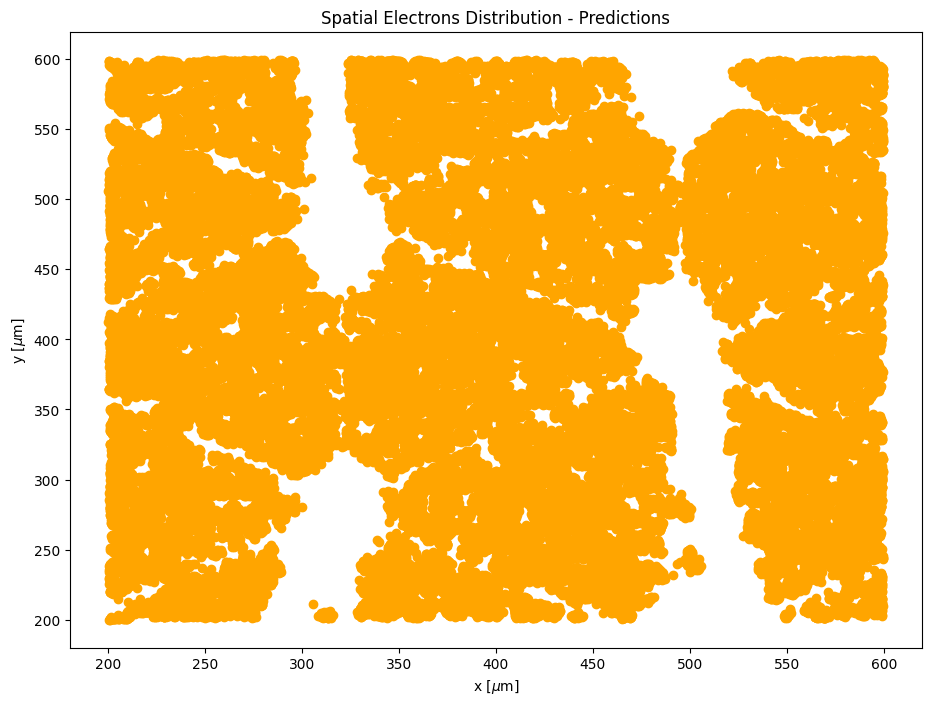

In [37]:
pred_points = reg_prova.predict(X_best_valid)
true_points = y_best_valid

plt.figure(figsize=(11,8))
plt.scatter(x=[item[0] for item in pred_points], y=[item[1] for item in pred_points], label='Predicted points', color='orange')
plt.xlabel('x [$\mu$m]')
plt.ylabel('y [$\mu$m]')
plt.title('Spatial Electrons Distribution - Predictions')
plt.savefig("Spatial_Electrons_Distribution_2.pdf", bbox_inches="tight")
plt.show()

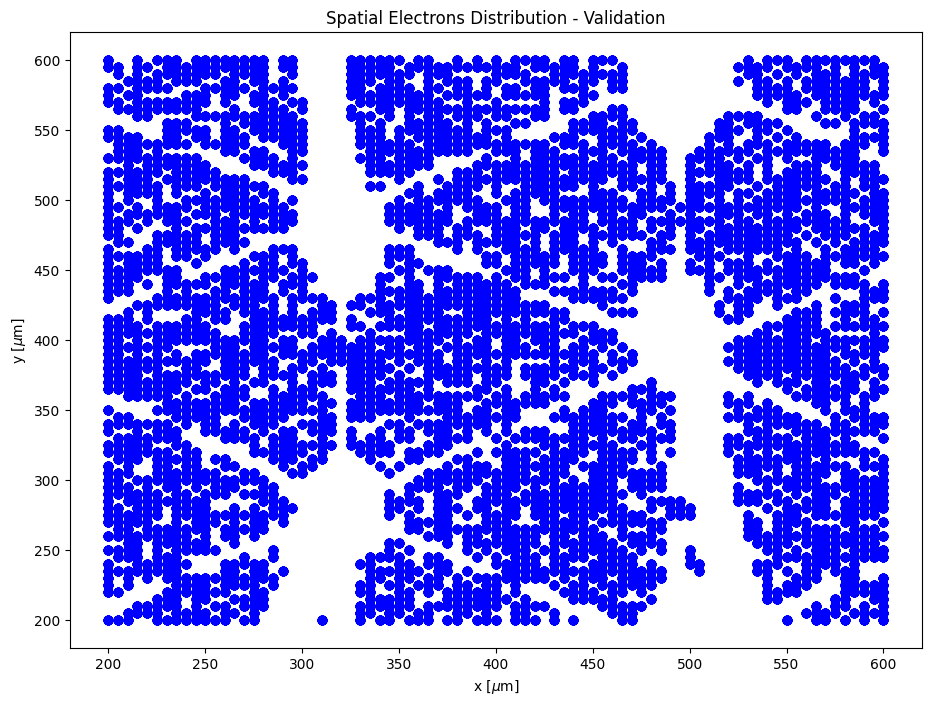

In [38]:

true_points = y_best_valid

plt.figure(figsize=(11,8))
plt.scatter(x=[item[0] for item in true_points], y=[item[1] for item in true_points], color='blue')
plt.xlabel('x [$\mu$m]')
plt.ylabel('y [$\mu$m]')
plt.title('Spatial Electrons Distribution - Validation')
plt.savefig("Spatial_Electrons_Distribution_3.pdf", bbox_inches="tight")
plt.show()